In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import requests
import matplotlib.pyplot as plt

In [7]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

In [8]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [9]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

In [10]:
df.drop(['dateChecked'],axis=1,inplace=True)

In [11]:
df['state']=df['state'].apply(str)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         11746 non-null  datetime64[ns]
 1   state                        11746 non-null  object        
 2   positive                     11647 non-null  float64       
 3   negative                     11509 non-null  float64       
 4   pending                      1344 non-null   float64       
 5   totalTestResults             11735 non-null  float64       
 6   hospitalizedCurrently        8912 non-null   float64       
 7   hospitalizedCumulative       6665 non-null   float64       
 8   inIcuCurrently               5026 non-null   float64       
 9   inIcuCumulative              1905 non-null   float64       
 10  onVentilatorCurrently        4207 non-null   float64       
 11  onVentilatorCumulative       666 non-null

In [13]:
df.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-29,AK,8674.0,442382.0,NaN,451056.0,49.0,NaN,NaN,NaN,...,451056,0,0,afd7a94cb0564b8c08d0c7d5a35034687ec529f9,0,0,0,0,0,NaN
1,2020-09-29,AL,153554.0,983163.0,NaN,1119712.0,773.0,17182.0,NaN,1802.0,...,1136717,16,91,f5cbe33a7d909f209064f42c91980edc96c86a63,0,0,0,0,0,NaN
2,2020-09-29,AR,82755.0,927902.0,NaN,1007905.0,491.0,5354.0,231.0,NaN,...,1010657,21,106,9674fdb795a3ec95f1a8018f9c8115611270bd2a,0,0,0,0,0,NaN
3,2020-09-29,AS,0.0,1571.0,NaN,1571.0,NaN,NaN,NaN,NaN,...,1571,0,0,713455ea3b0b8f55ade2e9e1ed521e7e7e43ff81,0,0,0,0,0,NaN
4,2020-09-29,AZ,218184.0,1239906.0,NaN,1453528.0,540.0,22047.0,119.0,NaN,...,1458090,9,28,aff6e79d8385633b46e9e237ccc3ec4b39f3138e,0,0,0,0,0,NaN


In [14]:
df.fillna(value=-1, inplace=True)

In [15]:
df.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,2020-09-29,AK,8674.0,442382.0,-1.0,451056.0,49.0,-1.0,-1.0,-1.0,...,451056,0,0,afd7a94cb0564b8c08d0c7d5a35034687ec529f9,0,0,0,0,0,-1.0
1,2020-09-29,AL,153554.0,983163.0,-1.0,1119712.0,773.0,17182.0,-1.0,1802.0,...,1136717,16,91,f5cbe33a7d909f209064f42c91980edc96c86a63,0,0,0,0,0,-1.0
2,2020-09-29,AR,82755.0,927902.0,-1.0,1007905.0,491.0,5354.0,231.0,-1.0,...,1010657,21,106,9674fdb795a3ec95f1a8018f9c8115611270bd2a,0,0,0,0,0,-1.0
3,2020-09-29,AS,0.0,1571.0,-1.0,1571.0,-1.0,-1.0,-1.0,-1.0,...,1571,0,0,713455ea3b0b8f55ade2e9e1ed521e7e7e43ff81,0,0,0,0,0,-1.0
4,2020-09-29,AZ,218184.0,1239906.0,-1.0,1453528.0,540.0,22047.0,119.0,-1.0,...,1458090,9,28,aff6e79d8385633b46e9e237ccc3ec4b39f3138e,0,0,0,0,0,-1.0


In [41]:
def plot_var(var='positiveIncrease',
             state='NY'):

    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

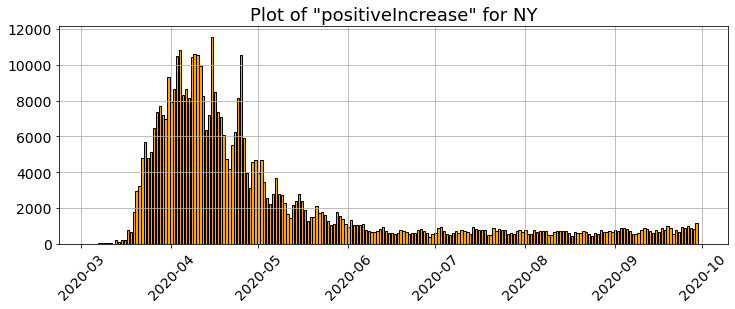

In [17]:
plot_var()

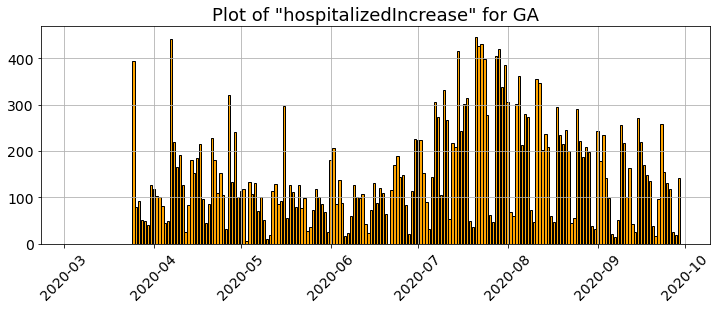

In [18]:
plot_var('hospitalizedIncrease','GA')

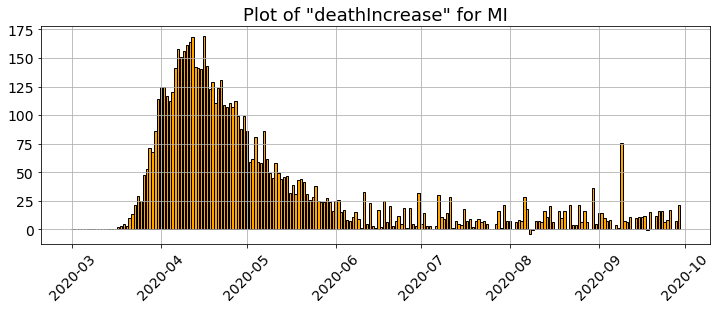

In [19]:
plot_var('deathIncrease','MI')

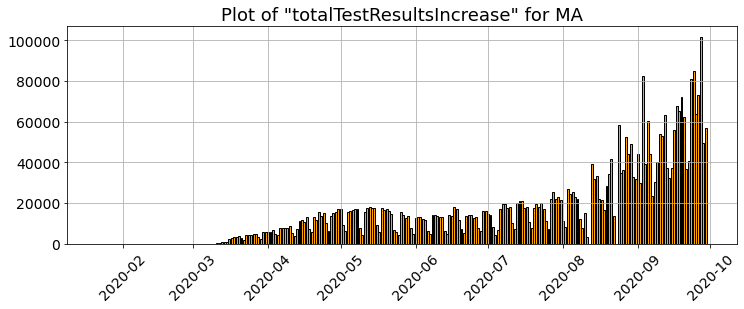

In [20]:
plot_var('totalTestResultsIncrease','MA')

In [58]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

# Test some plots

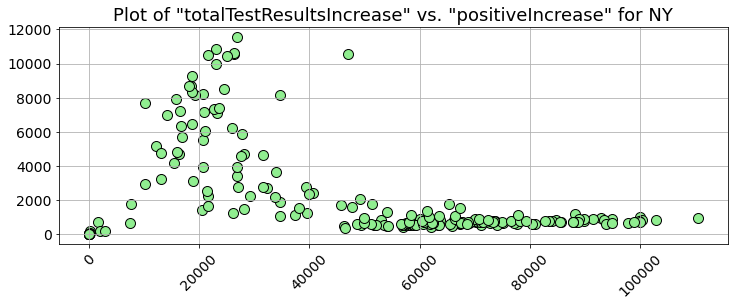

In [42]:
plot_xy(state='NY')

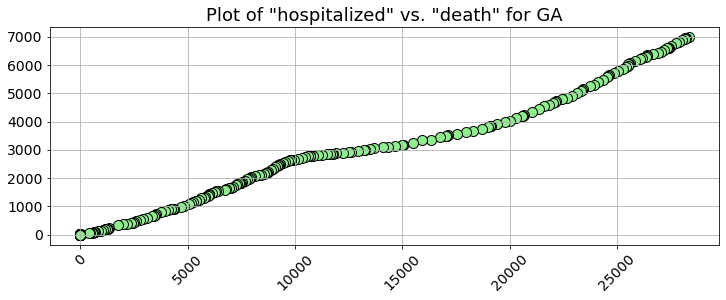

In [43]:
plot_xy('hospitalized','death','GA')

In [24]:
plot_xy('hospitalized','death','CA')

Some of the data unavailable for a scatter plot. Sorry!


# Testing tracker function

In [59]:
def plotTesting(lst_states=['NY','CA','MA','TX','PA']):

    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

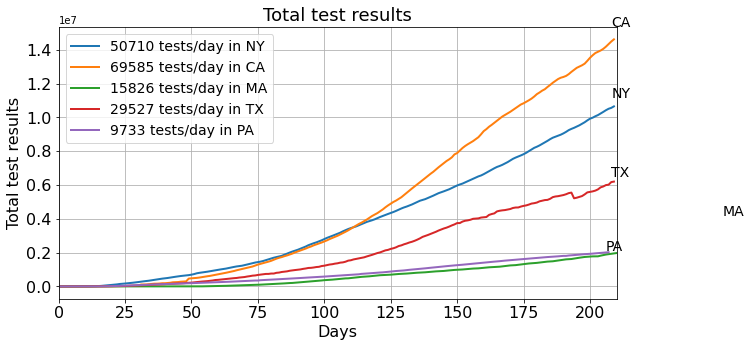

In [26]:
plotTesting()

#  Fatality ratio latest data

In [60]:
def fatality_ratio(state='CA'):
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

# Hospitalization ratio with the latest data

In [62]:
def hospitalization_ratio(state='NY'):
    
    date = df.iloc[0]['date']
    try:
        h = float(df[(df['state']==state) & (df['date']==date)]['hospitalized'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

# Positive case/total test ratio 

In [56]:
def positiveTest_ratio(state='NY'):
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

# Recovery ratio

In [57]:
def recovery_ratio(state='NY'):

    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

# Fatality ratio chart

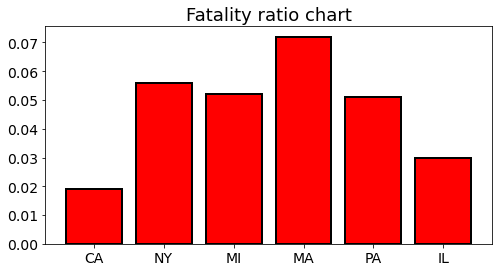

In [31]:
states = ['CA','NY','MI','MA','PA','IL']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)
plt.show()


# Hospitalization chart

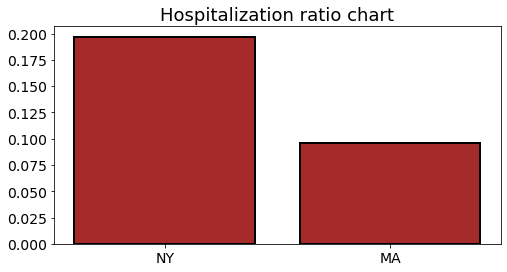

In [32]:
states = ['CA','NY','MI','MA','PA','IL']
hos,x = [],[]
for s in states:
    data = hospitalization_ratio(s)
    if data!=-1:
        hos.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Hospitalization ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=hos,color='brown',
        edgecolor='k',linewidth=2)
plt.show()

# Test positive ratio chart

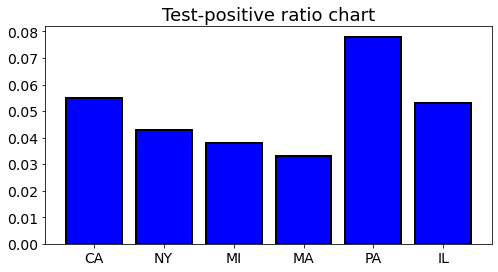

In [33]:
states = ['CA','NY','MI','MA','PA','IL']
tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

# Bubble charts

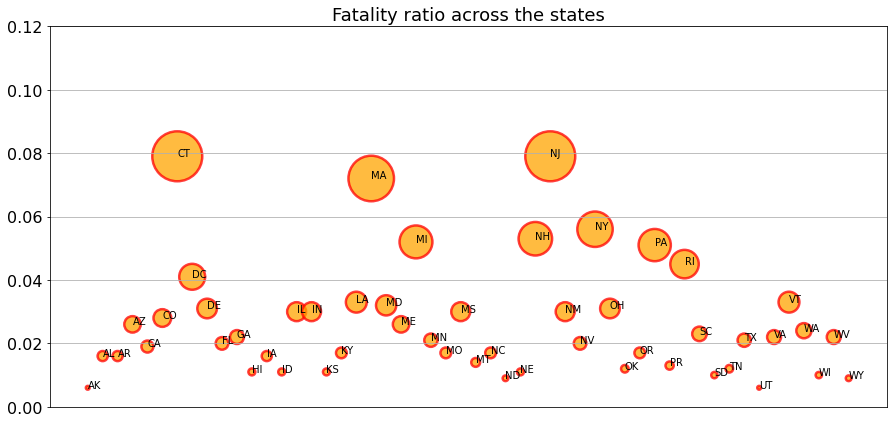

In [63]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)
fr = np.array(fr)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,  
    labelbottom=False)
plt.title("Fatality ratio across the states",fontsize=18)
plt.scatter(x=x,y=fr,
            s=4e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)

for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))
plt.ylim(0,0.12)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

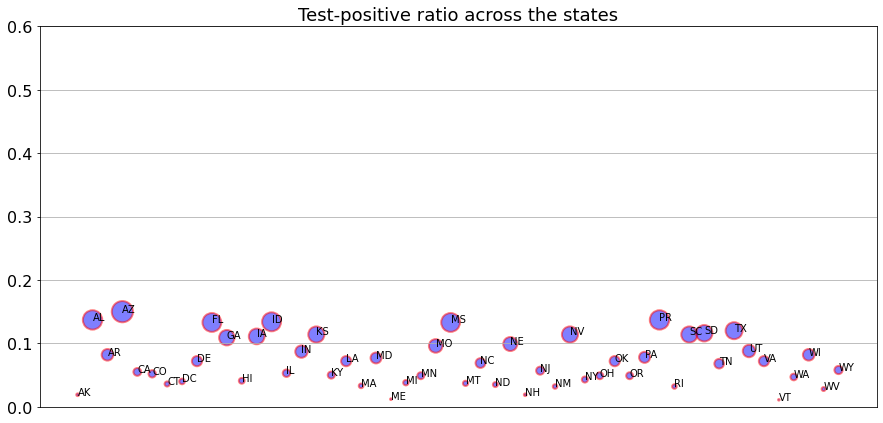

In [35]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
tp = np.array(tp)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,  
    top=False,         
    labelbottom=False)
plt.title("Test-positive ratio across the states",fontsize=18)
plt.scatter(x=x,y=tp,
            s=2e4*tp**2,
            color='blue',edgecolor='red',alpha=0.5,linewidth=2)
plt.xticks(rotation=90,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],tp[i]))
plt.ylim(0,0.6)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

# 14 days of decreasing case counts

In [67]:
def caseCountsdecrease(days=14,state='NY'):   

    positiveIncrease = np.array(df[df['state']==state]['positiveIncrease'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

# Plot for a few states

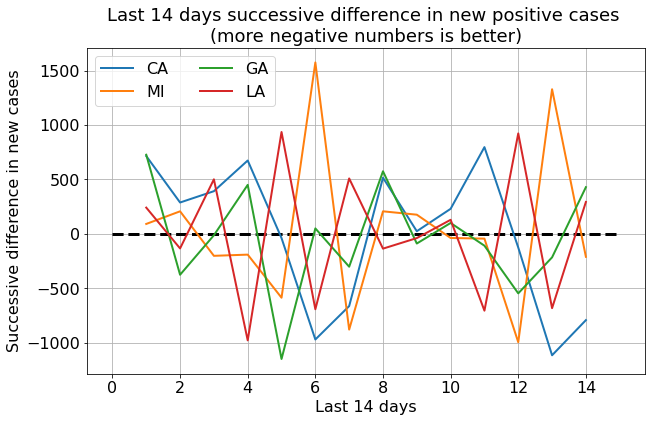

In [70]:
states = ['CA','MI','GA','LA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

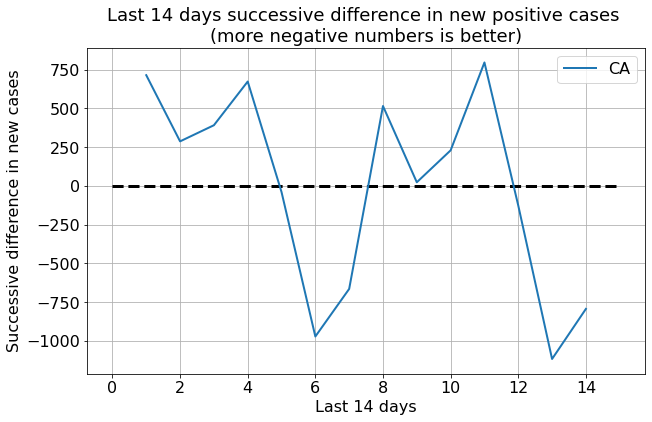

In [39]:
states = ['CA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

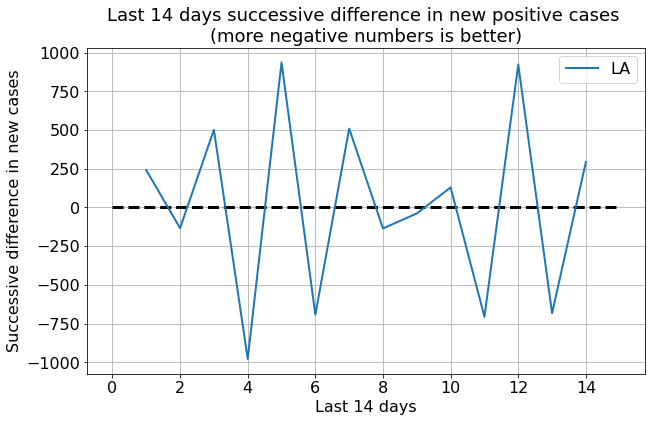

In [71]:
states = ['LA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()